In [1]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

# from composition.analysis.load_sim import load_sim
# from composition.support_functions.checkdir import checkdir
# import composition.analysis.plotting_functions as plotting

from composition.analysis import load_sim
import composition.analysis.plotting_functions as plotting

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set_palette('Paired', 10)
# sns.set_palette(sns.color_palette('Blues', 10))
sns.set_color_codes()

/home/jbourbeau/composition/analysis/load_sim.py:52: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:56: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: invalid value encountered in log10
  df['InIce_log_charge'] = np.nan_to_num(np.log10(df['InIce_charge_SRTCoincPulses']))


IT fraction contained = 0.387007866437
IT fraction contained = 0.450802938597
IT fraction contained = 0.539865902913
IT fraction contained = 0.56432625235
IT fraction contained = 0.971230186562
IT fraction contained = 0.992707217238
IT fraction contained = 0.998905640122
IT fraction contained = 0.998905594497
IT fraction contained = 0.999940680982
IT fraction contained = 0.999965610922


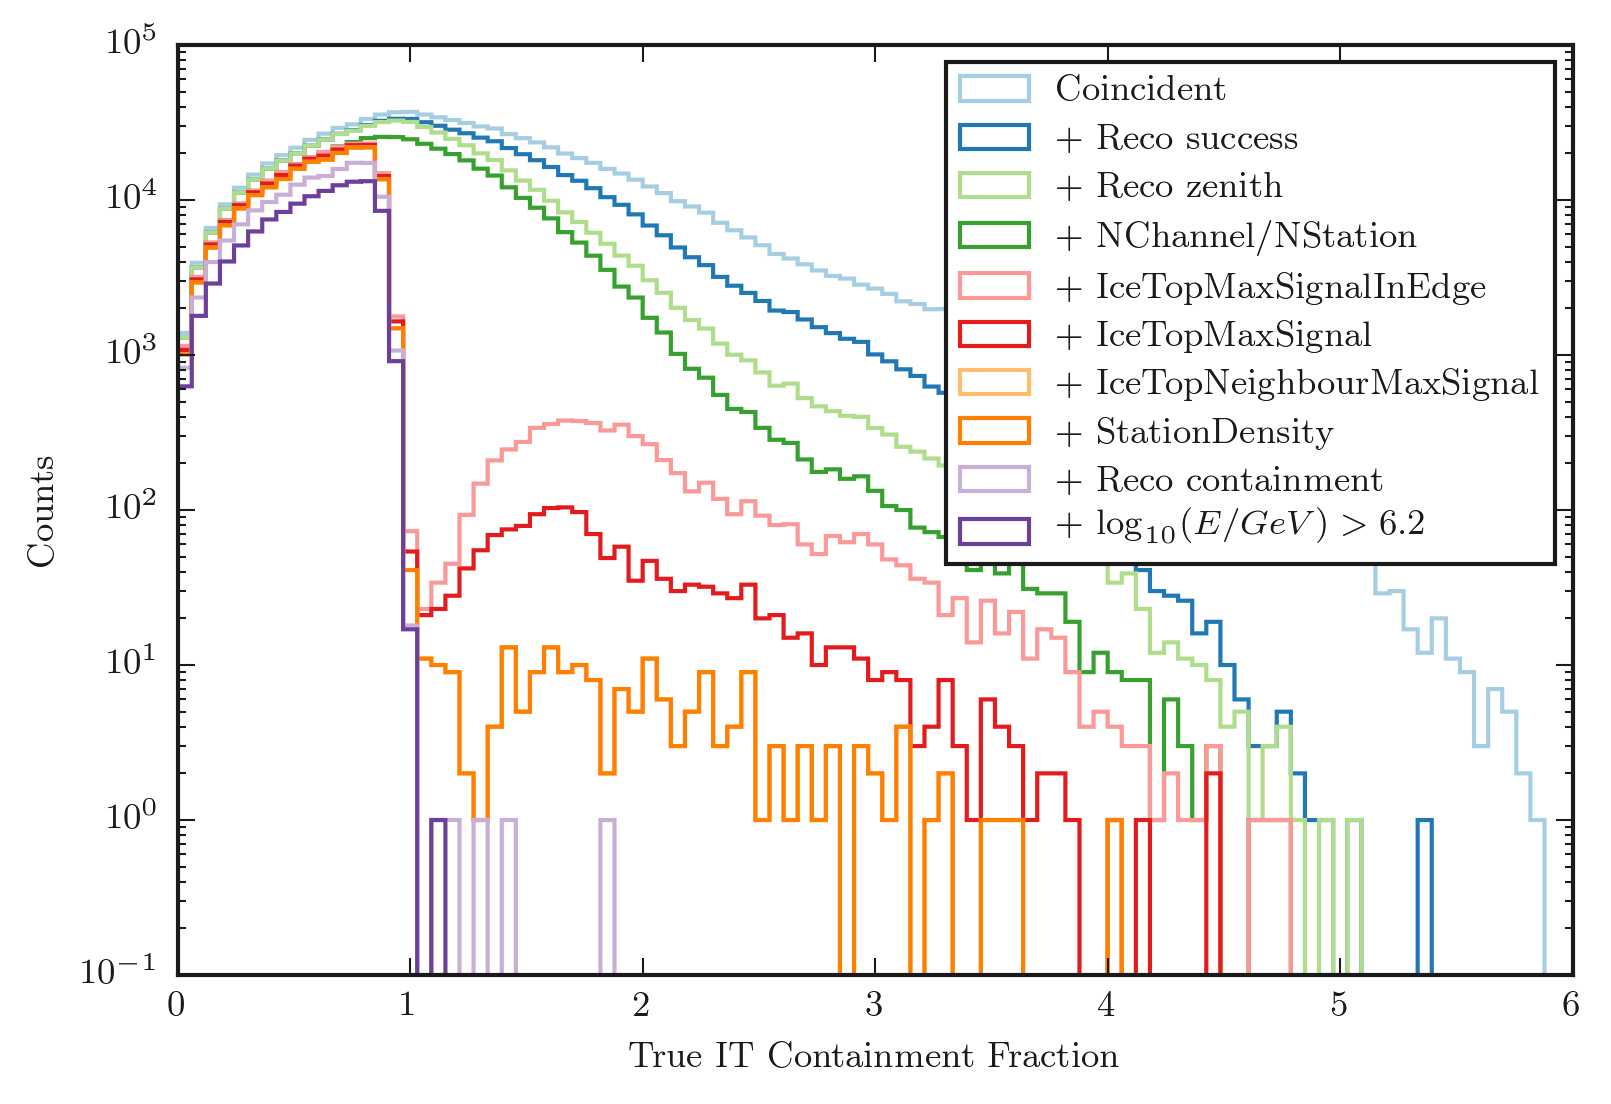

In [4]:
standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
                     'StationDensity', 'reco_containment', 'min_energy']
labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
          'StationDensity', 'Reco containment', '$\log_{10}(E/GeV) > 6.2$']
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True]*len(df))
fig, ax = plt.subplots()
containment_bins = np.linspace(0, 6, 100)
IT_containment = df[selection_mask]['IceTop_FractionContainment']
print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
sns.distplot(IT_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    
    IT_containment = df_cuts['IceTop_FractionContainment']
    print('IT fraction contained = {}'.format(sum(IT_containment <= 1.0)/len(IT_containment)))
    sns.distplot(IT_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
# axarr[0].legend()
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True IT Containment Fraction')
ax.set_ylabel('Counts')

InIce fraction contained = 0.720708081244
InIce fraction contained = 0.735711718447
InIce fraction contained = 0.74149467157
InIce fraction contained = 0.740300985715
InIce fraction contained = 0.78012811521
InIce fraction contained = 0.778515669361
InIce fraction contained = 0.778439025915
InIce fraction contained = 0.77843500013
InIce fraction contained = 0.915081530694
InIce fraction contained = 0.900572578149


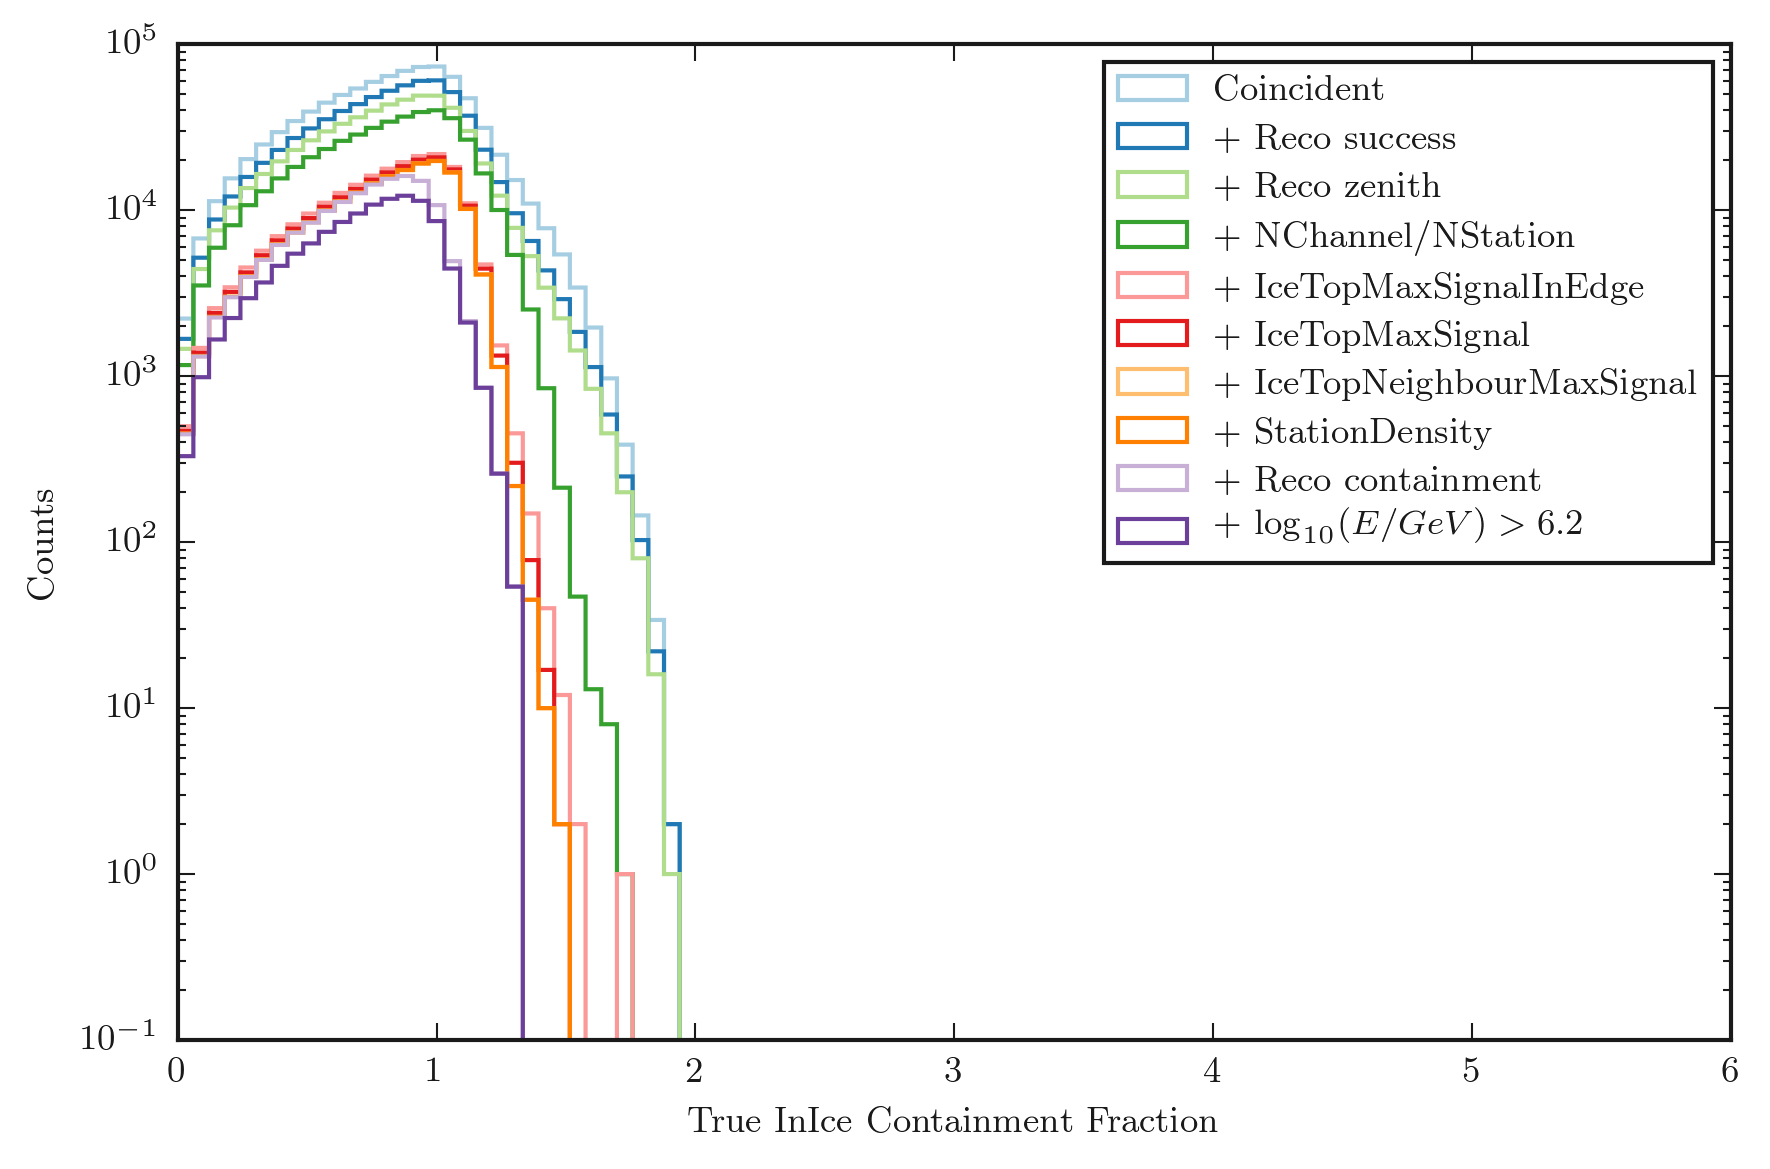

In [12]:
selection_mask = np.array([True]*len(df))
InIce_containment = df[selection_mask]['InIce_FractionContainment']
print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
fig, ax = plt.subplots()
sns.distplot(InIce_containment, containment_bins, kde=False,
             hist_kws={"histtype": "step", "linewidth": 1,
                       "alpha": 1}, 
             label='Coincident')
for cut_key, label in zip(standard_cut_keys, labels):
    selection_mask = selection_mask & cut_dict[cut_key]
    df_cuts = df[selection_mask]
    
    InIce_containment = df_cuts['InIce_FractionContainment']
    print('InIce fraction contained = {}'.format(sum(InIce_containment <= 1.0)/len(InIce_containment)))
    sns.distplot(InIce_containment, containment_bins, kde=False,
                 hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1}, 
                label='+ ' + label)
    
ax.legend()
ax.set_ylim([1e-1,1e5])
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('True InIce Containment Fraction')
ax.set_ylabel('Counts')
plt.tight_layout()

/home/jbourbeau/composition/analysis/load_sim.py:52: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:56: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: invalid value encountered in log10
  df['InIce_log_charge'] = np.nan_to_num(np.log10(df['InIce_charge_SRTCoincPulses']))


number of events = 116316


/home/jbourbeau/composition/analysis/plotting_functions.py:58: RuntimeWarning: divide by zero encountered in log10
  h = np.log10(h)


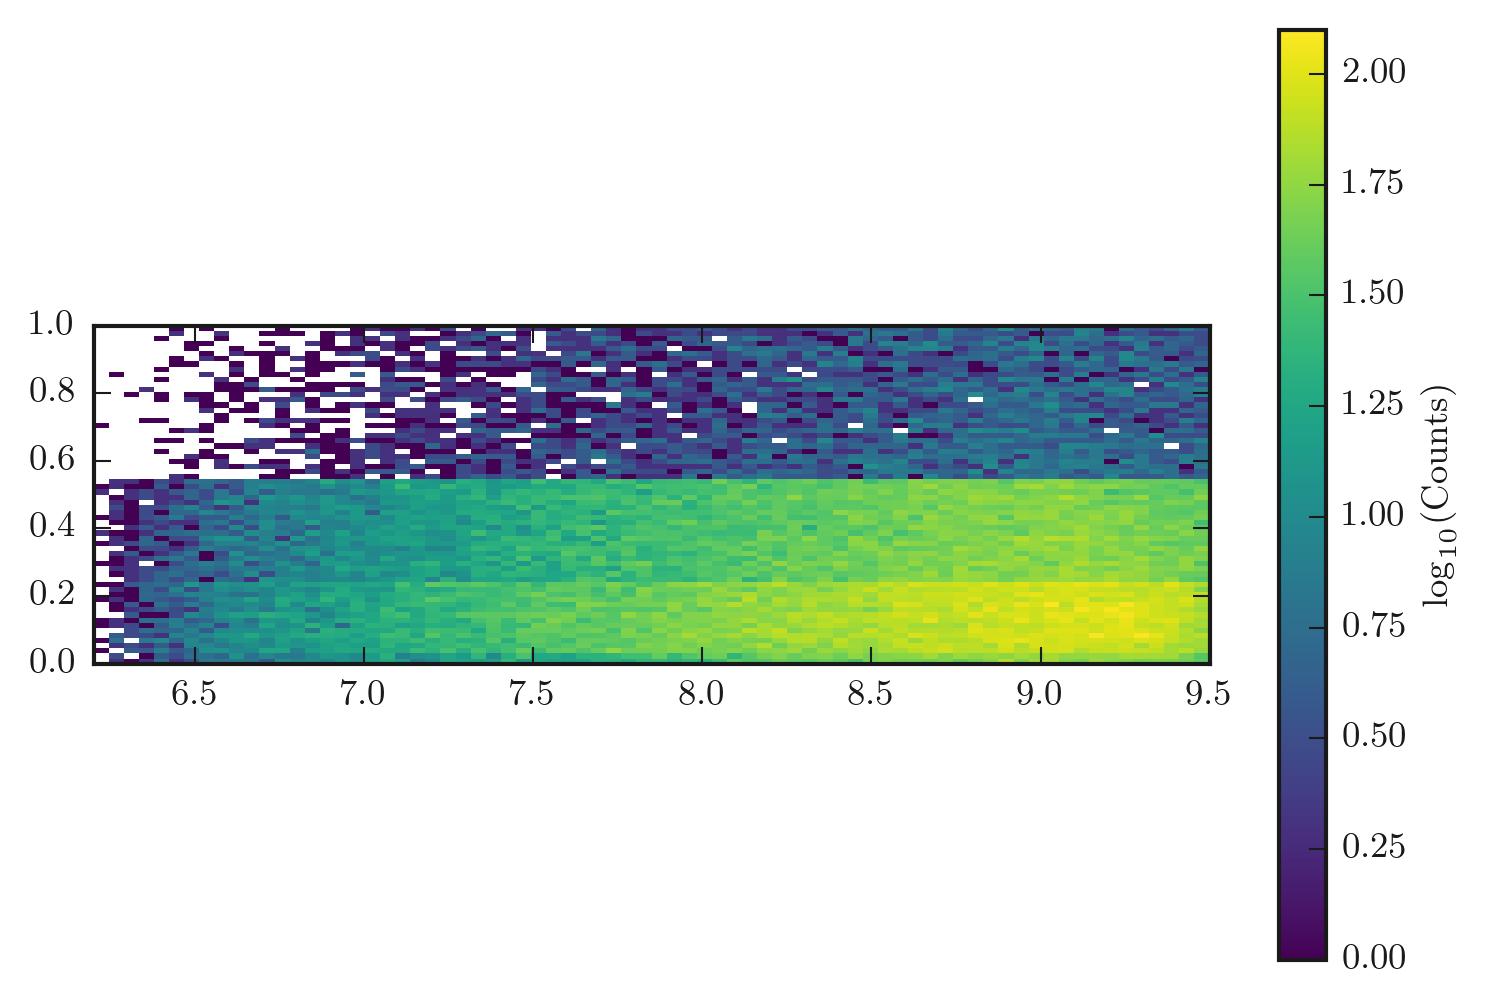

In [3]:
# Import ShowerLLH sim reconstructions and cuts to be made
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'min_hits', 'IceTopMaxSignalInEdge', 'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
                     'StationDensity', 'reco_containment', 'min_energy']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]
print('number of events = {}'.format(len(df)))

InIce_containment = df['InIce_FractionContainment']
log_energy = df['reco_log_energy']
MC_log_energy = df['MC_log_energy']
charge = df.InIce_log_charge

containment_bins = np.linspace(0, 1, 75)
energy_bins = np.arange(6.2, 9.51, 0.05)
bins = [containment_bins, energy_bins]

fig, ax = plt.subplots()
im = plotting.histogram_2D(InIce_containment, MC_log_energy, bins, log_counts=True, ax=ax)
# ax.set_title(title)
# plt.xlim([6.2, 9.5])
plt.show()

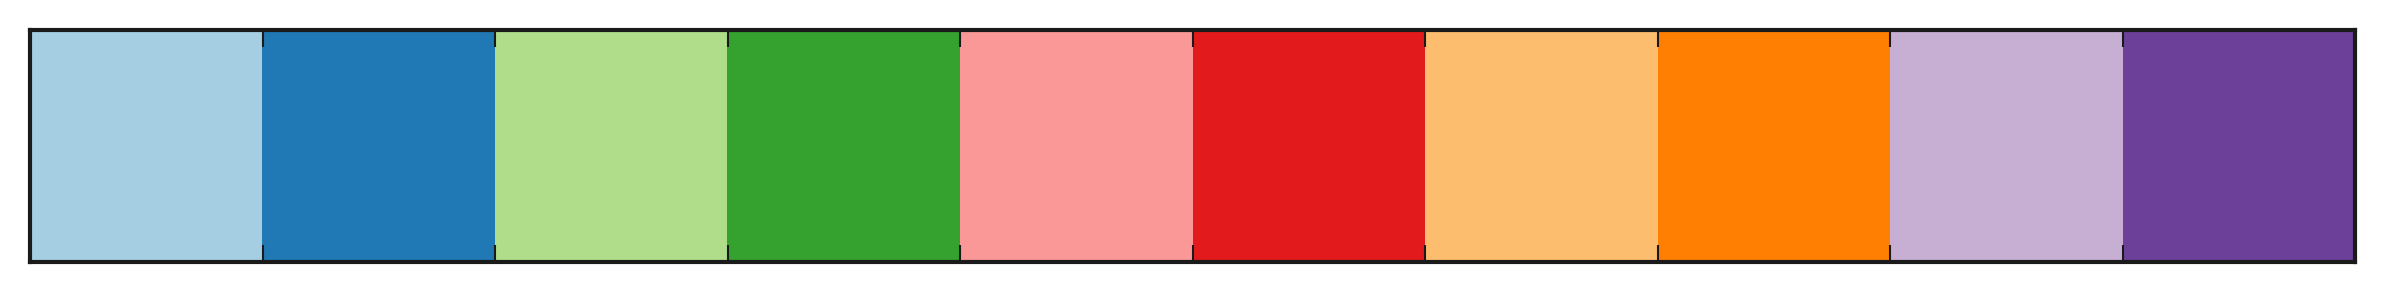

In [5]:
sns.palplot(sns.color_palette("Paired", 10))